<a href="https://colab.research.google.com/github/Ajkumar007/Ajkumar007/blob/main/TRUR_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [ ]:
path="/content/L_B_W_ml.csv"

In [ ]:
data=pd.read_csv(path)

In [ ]:
data

,v012,residence,education,m17,v457,religion_1,CHILD_WEIGHT,WOMEN_OCCUPATION,b4,Marital_status,Wealth_Index,v322
0,39,rural,primary,no,severe,Muslim,NBW,NaN,female,married,Poor,NaN
1,30,rural,secondary,yes,moderate,Muslim,NBW,NaN,male,married,Middle,NaN
2,28,rural,secondary,no,not anemic,Muslim,NBW,Not Workong,female,married,Middle,NaN
3,47,rural,no education,yes,moderate,Muslim,NBW,NaN,male,married,Middle,3
4,32,rural,secondary,yes,mild,Muslim,NBW,NaN,female,Single_women,Rich,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
85001,29,urban,primary,no,moderate,Muslim,NBW,NaN,male,married,Poor,NaN
85002,24,urban,no education,no,moderate,Muslim,LBW,NaN,female,married,Poor,NaN
85003,35,urban,no education,no,moderate,Muslim,NBW,NaN,male,married,Rich,NaN
85004,28,urban,no education,no,moderate,Muslim,NBW,NaN,female,married,Rich,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data.shape

(85006, 12)

In [ ]:
data.head()

,v012,residence,education,m17,v457,religion_1,CHILD_WEIGHT,WOMEN_OCCUPATION,b4,Marital_status,Wealth_Index,v322
0,39,rural,primary,no,severe,Muslim,NBW,NaN,female,married,Poor,NaN
1,30,rural,secondary,yes,moderate,Muslim,NBW,NaN,male,married,Middle,NaN
2,28,rural,secondary,no,not anemic,Muslim,NBW,Not Workong,female,married,Middle,NaN
3,47,rural,no education,yes,moderate,Muslim,NBW,NaN,male,married,Middle,3
4,32,rural,secondary,yes,mild,Muslim,NBW,NaN,female,Single_women,Rich,NaN


In [ ]:
data.columns

Index(['v012', 'residence', 'education', 'm17', 'v457', 'religion_1',
       'CHILD_WEIGHT', 'WOMEN_OCCUPATION', 'b4', 'Marital_status',
       'Wealth_Index', 'v322'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85006 entries, 0 to 85005
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   v012              85006 non-null  int64 
 1   residence         85006 non-null  object
 2   education         85006 non-null  object
 3   m17               85006 non-null  object
 4   v457              81810 non-null  object
 5   religion_1        85006 non-null  object
 6   CHILD_WEIGHT      85006 non-null  object
 7   WOMEN_OCCUPATION  12943 non-null  object
 8   b4                85006 non-null  object
 9   Marital_status    85006 non-null  object
 10  Wealth_Index      85006 non-null  object
 11  v322              8536 non-null   object
dtypes: int64(1), object(11)
memory usage: 7.8+ MB


In [ ]:
data.isnull().sum()

v012                    0
residence               0
education               0
m17                     0
v457                 3196
religion_1              0
CHILD_WEIGHT            0
WOMEN_OCCUPATION    72063
b4                      0
Marital_status          0
Wealth_Index            0
v322                76470
dtype: int64

In [ ]:
data.rename(columns = {'v012':'Mothers_age_'}, inplace = True)
data.rename(columns = {'m17':'Delivery_mode'}, inplace = True)   ####change the variables Names
data.rename(columns = {'v457':'anemia_level'}, inplace = True)
data.rename(columns = {'b4':'Sex_child'}, inplace = True)
data.rename(columns = {'v322':'Parity'}, inplace  = True)

In [ ]:
data['CHILD_WEIGHT'].replace(['NBW','LBW'],[0,1], inplace=True)

In [ ]:
data['Parity'].replace(['5+'],
                                [5], inplace=True)

In [ ]:
data['education'].replace(['no education', 'primary','secondary','higher'],
                        [0, 1, 2,3], inplace=True)
data['Delivery_mode'].replace(['no', 'yes'],
                        [0, 1], inplace=True)
data['religion_1'].replace(['Hindu', 'Muslim','christian','sikh','budhist','Others'],
                        [0, 1, 2, 3, 4, 5], inplace=True)

data['Sex_child'].replace(['male', 'female'],
                        [0, 1], inplace=True)

data['Marital_status'].replace(['married', 'Single_women'],
                        [0, 1], inplace=True)

data['residence'].replace(['rural', 'urban'],
                             [0, 1],inplace=True)

In [ ]:
data['Wealth_Index'].replace(['Poor ','Rich','Middle'],
                                [0,1,2], inplace=True)

In [ ]:
data['anemia_level'].replace(['not anemic','moderate','mild','severe'],
                                [0,1,2,3], inplace=True)

In [ ]:
#### putting missing value for parity
data["Parity"].fillna("2", inplace = True)
data["WOMEN_OCCUPATION"].fillna("0", inplace = True)
data["anemia_level"].fillna("0", inplace = True)

In [ ]:
data.Parity.value_counts()

2    80808
3     2572
4      944
5      619
1       63
Name: Parity, dtype: int64

In [ ]:
data['Wealth_Index'].replace(['Poor ','Rich','Middle'],
                                [0,1,2], inplace=True)

In [ ]:
data.Wealth_Index.value_counts()

Poor    41958
1       26279
2       16769
Name: Wealth_Index, dtype: int64

In [ ]:
data['Wealth_Index'].replace(['Poor'],
                                [0], inplace=True)

In [ ]:
data['WOMEN_OCCUPATION'].replace(['0', 'Not Workong','Working'],[0,1,2], inplace=True)

In [ ]:
data.WOMEN_OCCUPATION.value_counts()

0    72063
1    10321
2     2622
Name: WOMEN_OCCUPATION, dtype: int64

In [ ]:
from google.colab import files
data.to_csv('birth_wt.csv') 
files.download('birth_wt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.shape

(85006, 12)

In [ ]:
data.describe()

,Mothers_age_,residence,education,Delivery_mode,religion_1,CHILD_WEIGHT,WOMEN_OCCUPATION,Sex_child,Marital_status,Wealth_Index
count,85006.000000,85006.000000,85006.000000,85006.000000,85006.000000,85006.000000,85006.000000,85006.000000,85006.000000,85006.000000
mean,25.992306,0.199598,1.656377,0.214208,0.453991,0.097005,0.183105,0.482189,0.010682,0.703680
std,4.827505,0.399700,0.960601,0.410274,0.941758,0.295966,0.459641,0.499686,0.102799,0.776568
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,49.000000,1.000000,3.000000,1.000000,5.000000,1.000000,2.000000,1.000000,1.000000,2.000000


In [ ]:
print(data.isnull().sum())

Mothers_age_        0
residence           0
education           0
Delivery_mode       0
anemia_level        0
religion_1          0
CHILD_WEIGHT        0
WOMEN_OCCUPATION    0
Sex_child           0
Marital_status      0
Wealth_Index        0
Parity              0
dtype: int64


NameError: ignored

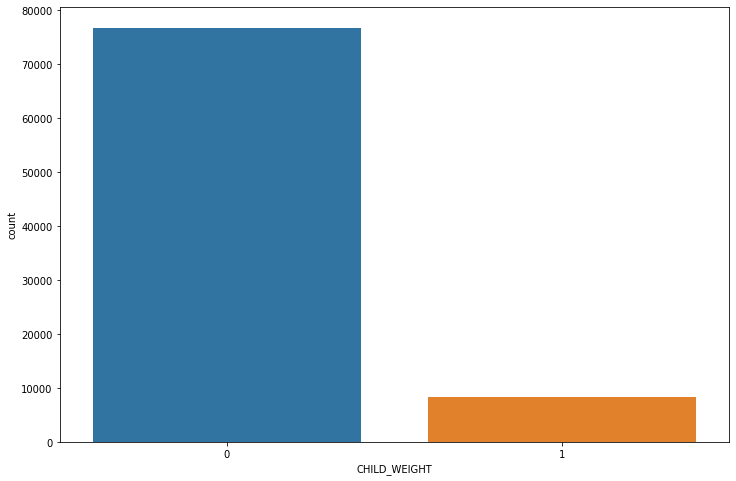

In [ ]:
# Let see how many children has been low birth and normal birth
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender'] = sns.countplot(x="CHILD_WEIGHT", data=data)
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated or not')

In [ ]:
data.WOMEN_OCCUPATION.value_counts()

0    72063
1    10321
2     2622
Name: WOMEN_OCCUPATION, dtype: int64

In [ ]:
independant=[  'Mothers_age_', 'residence', 'education', 'Delivery_mode',
       'anemia_level', 'religion_1', 'WOMEN_OCCUPATION',
       'Sex_child', 'Marital_status', 'Wealth_Index', 'Parity']

In [ ]:
x=data[independant]

In [ ]:
y=data.CHILD_WEIGHT

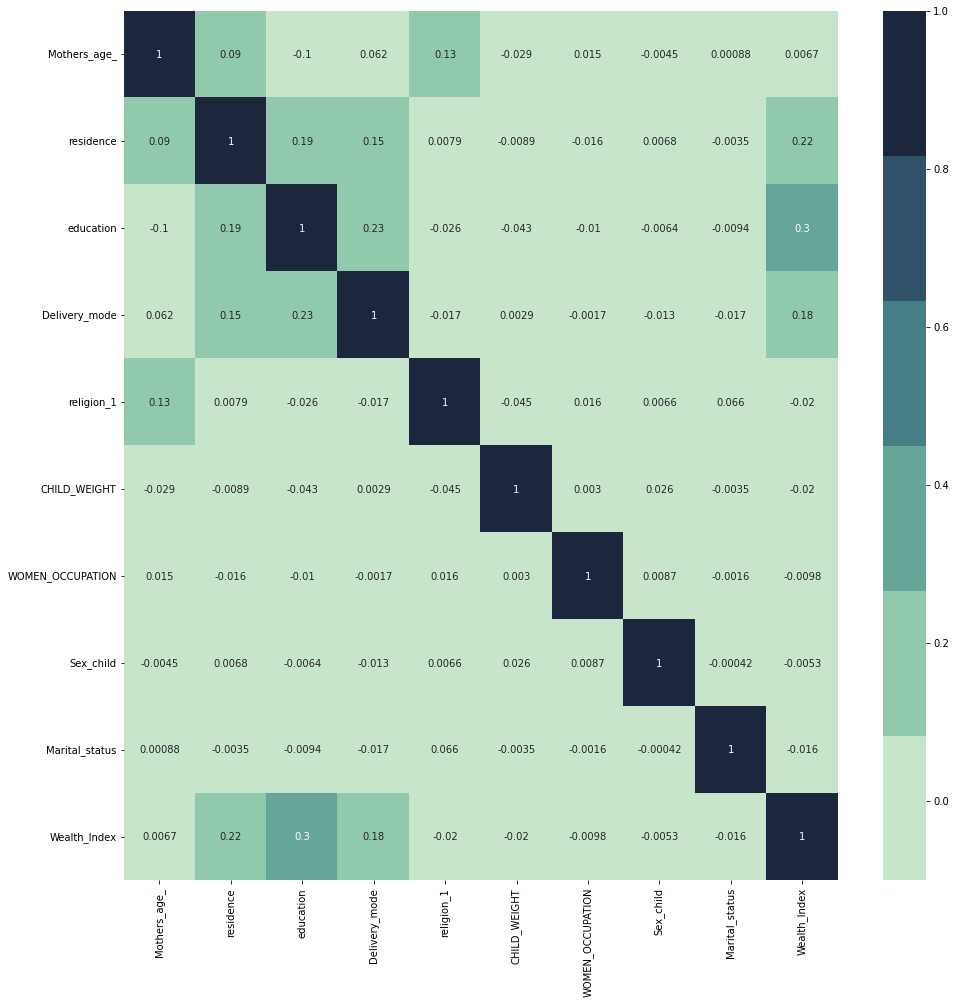

In [ ]:
fig = plt.figure(figsize=[16,16])
sns.heatmap(data.corr(), annot=True, cmap=sns.cubehelix_palette(rot=-.4))

plt.show()

In [ ]:
data.Parity.value_counts()

2    80808
3     2572
4      944
5      619
1       63
Name: Parity, dtype: int64


#classification libraries**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

In [ ]:
#### Training and Testing data set splitup
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape

(51003, 11)

In [ ]:
x_test.shape

(34003, 11)

##### LOGISTIC REGRESSION

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_predict = lr_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy_lr=accuracy_score(lr_predict,y_test)*100
accuracy_lr

90.36849689733259

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


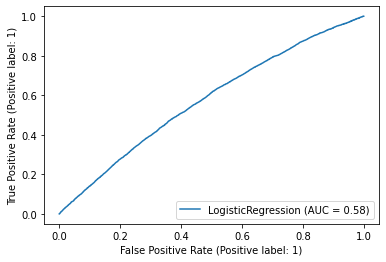

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
lr_model.fit(x, y)
metrics.plot_roc_curve( lr_model,x_train, y_train )
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


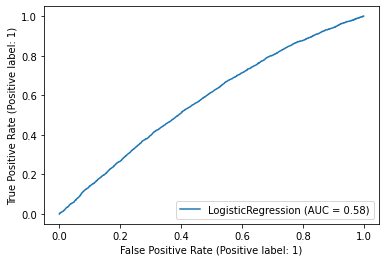

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
lr_model.fit(x_train, y_train)
metrics.plot_roc_curve( lr_model,x_test, y_test, )
plt.show()

In [ ]:
 lr_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(confusion_matrix(lr_predict,y_test))

[[30728  3275]
 [    0     0]]


# Logistic Regression ROC curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


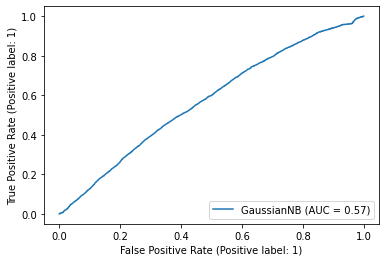

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
metrics.plot_roc_curve(gaussian, x_test, y_test)
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,  y_score)

In [ ]:
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification


model = LogisticRegression()
model.fit(x_train, y_train)
y_score = model.predict(x_test)

fpr, tpr, thresholds = roc_curve(y_test,  y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})', 
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [ ]:
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [ ]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
  print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
  print('Null accuracy:\n', y_test.value_counts())
  print('Percentage of ones:', y_test.mean())
  print('Percentage of zeros:',1 - y_test.mean())
  print('True:', y_test.values[0:25])
  print('Pred:', y_pred_class[0:25])
    #Confusion matrix
    # save confusion matrix and slice into four pieces
  confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
  TP = confusion[1, 1]
  TN = confusion[0, 0]
  FP = confusion[0, 1]
  FN = confusion[1, 0]
    
    # visualize Confusion Matrix
  sns.heatmap(confusion,annot=True,fmt="d") 
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()
  accuracy = metrics.accuracy_score(y_test, y_pred_class)
  print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
  print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
  false_positive_rate = FP / float(TN + FP)
  print('False Positive Rate:', false_positive_rate)
  print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
  print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
  print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
  print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
  print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
  model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
  y_pred_prob = model.predict_proba(X_test)[:, 1]
    
  if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        y_pred_prob = y_pred_prob.reshape(-1,1) 
        y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
    # print the first 10 predicted probabilities
        print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
        ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
        roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted pro
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
        if plot == True:
          plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
        def evaluate_threshold(threshold):
          print('Specificity for ' + str(threshold) + ' :',1 - fpr[thresholds > threshold][-1])
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
    # One way of setting threshold
        predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
        confusion = metrics.confusion_matrix(y_test, predict_mine)
        print(confusion)
        

        return accuracy

In [ ]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(x_test)

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Feature: 0, Score: -0.02124
Feature: 1, Score: 0.02167
Feature: 2, Score: -0.16360
Feature: 3, Score: 0.13699
Feature: 4, Score: 0.02842
Feature: 5, Score: -0.18729
Feature: 6, Score: 0.02412
Feature: 7, Score: 0.17840
Feature: 8, Score: -0.03845
Feature: 9, Score: -0.03854
Feature: 10, Score: 0.02318


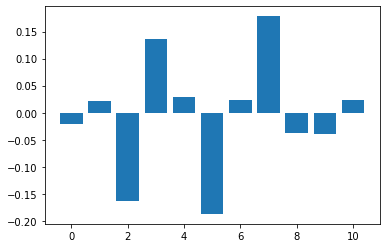

In [ ]:
model_LR = LogisticRegression()
# fit the model
model_LR.fit(x, y)
# get importance
importance = model_LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#RANDOM FOREST CLASSIFIER

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train,y_train)
RF_predict = RF_model.predict(x_test)

In [ ]:
RFt_model = RandomForestClassifier()    #### check the training accuracy
RFt_model.fit(x_train,y_train)
RFx_predict = RFt_model.predict(x_train)

In [ ]:
accuracy_RF=accuracy_score(RFx_predict,y_train)*100
accuracy_RF

92.08120462489917

In [ ]:
accuracy_RF=accuracy_score(RF_predict,y_test)*100
accuracy_RF

89.28319347502158

In [ ]:
print(confusion_matrix(RF_predict,y_test))

[[22715  2386]
 [  347    54]]


Feature: 0, Score: 0.31702
Feature: 1, Score: 0.06737
Feature: 2, Score: 0.06419
Feature: 3, Score: 0.05948
Feature: 4, Score: 0.15087
Feature: 5, Score: 0.05240
Feature: 6, Score: 0.09087
Feature: 7, Score: 0.03603
Feature: 8, Score: 0.01246
Feature: 9, Score: 0.10045
Feature: 10, Score: 0.04886


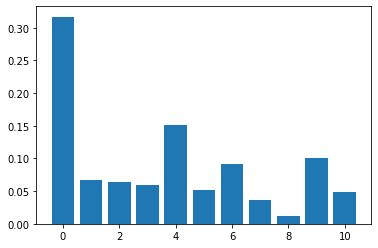

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define the model
model_random = RandomForestRegressor()
# fit the model
model_random.fit(x, y)
# get importance
importance = model_random.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



```
`# This is formatted as code`
```

#####Decision Tree classifier

In [ ]:
model_Dt=DecisionTreeClassifier(criterion= 'entropy')

In [ ]:
model_Dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred=model_Dt.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
predDTY = model_Dt.predict(x_test)
print(predDTY[1:10,])

[0 0 0 0 0 0 0 0 0]


In [ ]:
DT=confusion_matrix(y_pred,y_test)
DT

array([[22451,  2351],
       [  611,    89]])

In [ ]:
accuracy_DT=accuracy_score(predDTY,y_test)*100
accuracy_DT

88.38522468825974

In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, predDTY)

In [ ]:

threshold1

array([2, 1, 0])

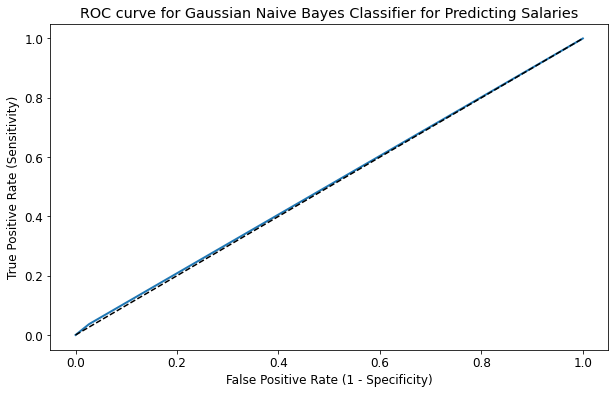

In [ ]:
from sklearn.metrics import roc_curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, predDTY)

plt.figure(figsize=(10,6))

plt.plot(false_positive_rate1, true_positive_rate1, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

Feature: 0, Score: 0.32366
Feature: 1, Score: 0.06103
Feature: 2, Score: 0.06847
Feature: 3, Score: 0.05692
Feature: 4, Score: 0.13936
Feature: 5, Score: 0.05298
Feature: 6, Score: 0.10211
Feature: 7, Score: 0.03416
Feature: 8, Score: 0.01290
Feature: 9, Score: 0.09946
Feature: 10, Score: 0.04894


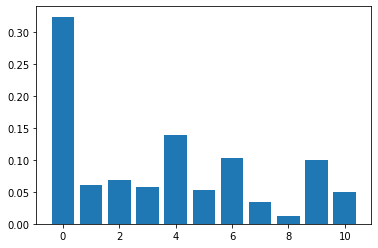

In [ ]:
model = DecisionTreeRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

####DECISION TREE ROC CURVE# New Section[link text](https://)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predDTY,y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     24788
           1       0.04      0.12      0.06       714

    accuracy                           0.88     25502
   macro avg       0.50      0.51      0.50     25502
weighted avg       0.95      0.88      0.91     25502



In [ ]:
kk=confusion_matrix(predDTY,y_test)

In [ ]:
kk

array([[22437,  2351],
       [  625,    89]])

In [ ]:

total1=sum(sum(kk))
#####from confusion matrix calculate accuracy
accuracy1=(kk[0,0]+kk[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = kk[0,0]/(kk[0,0]+kk[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = kk[1,1]/(kk[1,0]+kk[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.8833032703317387
Sensitivity :  0.9051557205099242
Specificity :  0.12464985994397759


In [ ]:
Sensitivity :  0.9050437982480701
Specificity :  0.1317365269461078

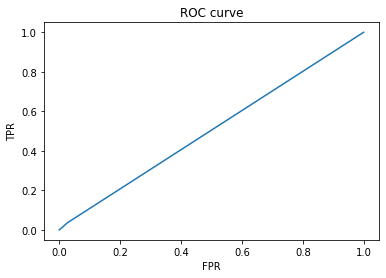

In [ ]:

Sensitivity, Specificity, _ = roc_curve(y_test, y_pred)
plt.clf()
plt.plot(Sensitivity, Specificity)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Gausian CLASSIFIER





In [ ]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Ygb_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

90.06

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


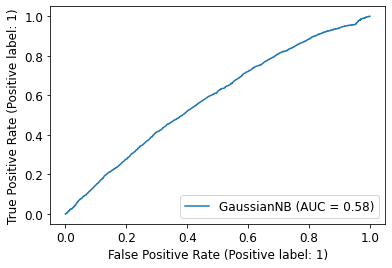

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
metrics.plot_roc_curve(gaussian, x_test, y_test)
plt.show()

###
#Confusion matrix, Accuracy, sensitivity and specificity


In [ ]:
confusion_matrix(Ygb_pred,y_test)

array([[23009,  2437],
       [   53,     3]])

In [ ]:
from sklearn.metrics import confusion_matrix

acc_gaussian = round(gaussian.score(x_t, y_train) * 100, 2)
acc_gaussian

In [ ]:
print(classification_report(Ygb_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     25446
           1       0.00      0.05      0.00        56

    accuracy                           0.90     25502
   macro avg       0.50      0.48      0.48     25502
weighted avg       1.00      0.90      0.95     25502



# # K nearest Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Yknn_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

89.21

In [ ]:
print(confusion_matrix(Yknn_pred,y_test))

[[22367  2330]
 [  695   110]]


In [ ]:
print(classification_report(Yknn_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     24697
           1       0.05      0.14      0.07       805

    accuracy                           0.88     25502
   macro avg       0.51      0.52      0.50     25502
weighted avg       0.94      0.88      0.91     25502



In [ ]:
knn=confusion_matrix(Yknn_pred,y_test)
knn

array([[22367,  2330],
       [  695,   110]])

Feature: 0, Score: 0.01720
Feature: 1, Score: 0.00385
Feature: 2, Score: 0.01077
Feature: 3, Score: 0.00464
Feature: 4, Score: 0.01135
Feature: 5, Score: 0.00889
Feature: 6, Score: 0.00470
Feature: 7, Score: 0.00736
Feature: 8, Score: 0.00030
Feature: 9, Score: 0.00813
Feature: 10, Score: 0.00203


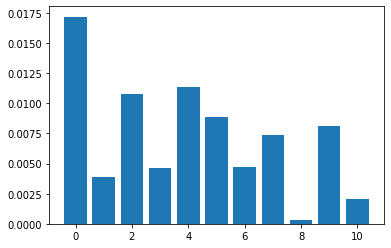

In [ ]:

# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
# define the model
model_KN = KNeighborsRegressor()
# fit the model
model_KN.fit(x, y)
# perform permutation importance
results = permutation_importance(model_KN, x, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# SUPPORT VECTOR MACHINE

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
Ysvm_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

90.24

In [ ]:
print(classification_report(Ysvm_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     25502
           1       0.00      0.00      0.00         0

    accuracy                           0.90     25502
   macro avg       0.50      0.45      0.47     25502
weighted avg       1.00      0.90      0.95     25502



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
support_matrix=confusion_matrix(Ysvm_pred,y_test)
support_matrix

array([[23062,  2440],
       [    0,     0]])

In [ ]:
svc_imp = SVC()
svc_imp.fit(x, y)

SVC()

Text(0.5, 0, 'Permutation Importance')

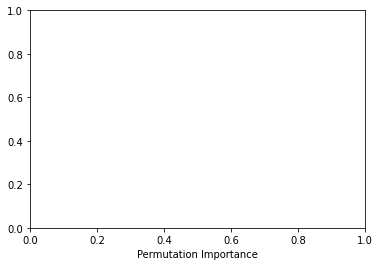

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)

perm_importance = permutation_importance(svc, x_test, y_test)

feature_names = ['feature1', 'feature2', 'feature3' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.xlabel("Permutation Importance")

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

In [ ]:
x.columns